# TP2 - ADM

**Louis COUPPIÉ, Adrien BERTRAND**

In [13]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')

### Question 1

In [15]:
data = pd.read_csv('../data/villes.csv', sep=';', header=0)
print(data.head(3))

X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
print(X_norm)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
print(X_pca)


[[ 1.63835106  1.78748032  1.35686597  1.16748094  1.09413658  1.2081338
   1.11734499  1.39767179  1.73963204  1.93208186  1.82836605  1.68024825]
 [ 0.116831    0.05000944 -0.1285452  -0.32148026 -0.52942092 -0.42704427
  -0.5237069  -0.53585369 -0.41130215 -0.27258829 -0.12654562  0.04961627]
 [ 0.29071901  0.27862403  0.44276679  0.28764023  0.10588418 -0.31024584
  -0.12587614 -0.0270312  -0.0016004   0.1108326   0.10618196  0.22126174]
 [-1.23080105 -1.18450934 -0.98551318 -0.79524064 -0.52942092 -0.48544349
  -0.5237069  -0.58673594 -0.71857846 -0.89564725 -1.01091043 -1.1948134 ]
 [ 1.59487906  1.4674199   1.52825957  0.76140061  0.2470631   0.04014946
  -0.02641845  0.22738005  0.8178031   1.21316768  1.40945641  1.46569141]
 [ 0.72543903  0.82729905  1.24260358  1.30284105  1.02354712  0.91613772
   0.57032769  0.7870848   0.86901582  0.73389156  0.57163712  0.60746405]
 [ 0.94279904  0.4615157  -0.1856764  -1.13364091 -1.94121006 -1.94542391
  -2.06530111 -1.75702768 -1.1282

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
clustering = kmeans.predict(X)
print(clustering)

[1 0 0 2 1 1 0 2 2 2 2 2 0 2 1 1 2 0 1 1 2 0 1 2 0 0 2 2 1 1 0 2]


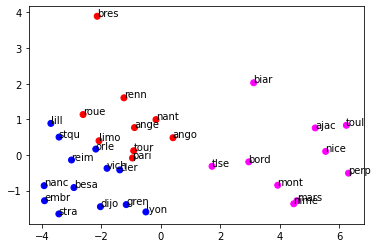

In [34]:
colors = ['red','magenta','blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()